### Exploração de Dados em Dados de Monitoramento do Comportamento dos Usuários do Produto

Para medir o impacto de nossas soluções consideramos essencial
acompanhar o sucesso das ferramentas que disponibilizamos para nossos
usuários (gestores do SUS e profissionais da saúde).

Nesse estudo de caso pediremos para você realizar uma análise
exploratória para identificar padrões de uso e tirar conclusões sobre o
engajamento das ferramentas e atividade dos usuários que acessam a área
logada do Impulso Previne.

O exploração deve ser focada para tirar apenas conclusões sobre os 3
pontos abaixo:

* 1. Taxas de primeiro acesso na área logada

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
usuarios = pd.read_csv('usuarios_cadastrados_ip.csv')
eventos = pd.read_csv('registro_de_eventos_ip.csv')

In [21]:
usuarios['criacao_data'] = pd.to_datetime(usuarios['criacao_data'])

In [22]:
tipo_coluna_data = eventos['periodo_data_hora'].dtype
print("Tipo de dado da coluna 'data':", tipo_coluna_data)

Tipo de dado da coluna 'data': int64


In [23]:
eventos['periodo_data_hora'] = pd.to_datetime(eventos['periodo_data_hora'], format='%Y%m%d%H')

In [17]:
eventos.head()

,sessao_id,periodo_data_hora,usuario_id,pagina_url,eventos,sessao_duracao
0,23098510-87ea-49af-8514-d2a7b0eac241,2023-07-31 23:00:00,3c709728-4613-40aa-ad5a-9baf5f5b2eb2,/inicio,2,0.0
1,08410890-9a51-4aa5-bc7c-2f1b97444695,2023-07-31 23:00:00,3c709728-4613-40aa-ad5a-9baf5f5b2eb2,/inicio,2,11.0
2,cf1f319e-c570-4126-8fed-887689e92f9b,2023-07-31 23:00:00,3c709728-4613-40aa-ad5a-9baf5f5b2eb2,/lista_nominal_hipertensos,18,754.0
3,f114572a-9d01-42f7-81bb-0ddbb025e2bc,2023-07-31 23:00:00,3c709728-4613-40aa-ad5a-9baf5f5b2eb2,/lista_nominal_diabeticos,2,0.0
4,16df6222-89d5-4887-b82e-1b4938e47b51,2023-07-31 23:00:00,3c709728-4613-40aa-ad5a-9baf5f5b2eb2,/lista_nominal_diabeticos,6,121.0


In [8]:
primeiros_acessos = eventos.groupby('usuario_id')['periodo_data_hora'].min()

In [9]:
acessos_por_mes = primeiros_acessos.groupby(primeiros_acessos.dt.to_period("M")).count()

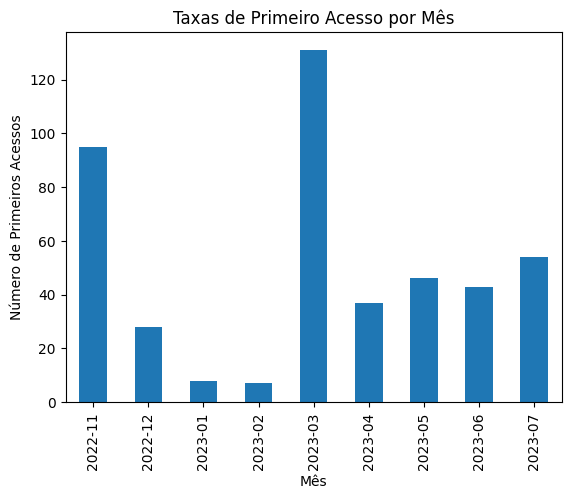

In [24]:
acessos_por_mes.plot(kind='bar')
plt.title('Taxas de Primeiro Acesso por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Primeiros Acessos')
plt.show()

* 2. Comparação da atividade entre usuários antigos e novos

In [25]:
usuarios['tipo_usuario'] = usuarios['criacao_data'].apply(lambda x: 'novo' if x > '2023-01-01' else 'antigo')


# Como não foi explicíto de forma clara oque se classificaria como um usuário antigo ou um novo usuário, foi definido a data de 01-01-2023 como marco para definição de usuários novos e antigos

TypeError: '>' not supported between instances of 'Timestamp' and 'str'

In [46]:
dados_completos = pd.merge(eventos, usuarios, left_on='usuario_id', right_on='id_usuario')

In [47]:
print(dados_completos.columns)

Index(['sessao_id', 'periodo_data_hora', 'usuario_id', 'pagina_url', 'eventos',
       'sessao_duracao', 'id_usuario', 'municipio', 'cargo', 'criacao_data',
       'tipo_usuario'],
      dtype='object')


In [49]:
dados_completos.head()

,sessao_id,periodo_data_hora,usuario_id,pagina_url,eventos,sessao_duracao,id_usuario,municipio,cargo,criacao_data,tipo_usuario
0,23098510-87ea-49af-8514-d2a7b0eac241,2023073123,3c709728-4613-40aa-ad5a-9baf5f5b2eb2,/inicio,2,0.0,3c709728-4613-40aa-ad5a-9baf5f5b2eb2,Boa Vista - PB,Coordenação de Equipe,2023-03-03,novo
1,08410890-9a51-4aa5-bc7c-2f1b97444695,2023073123,3c709728-4613-40aa-ad5a-9baf5f5b2eb2,/inicio,2,11.0,3c709728-4613-40aa-ad5a-9baf5f5b2eb2,Boa Vista - PB,Coordenação de Equipe,2023-03-03,novo
2,cf1f319e-c570-4126-8fed-887689e92f9b,2023073123,3c709728-4613-40aa-ad5a-9baf5f5b2eb2,/lista_nominal_hipertensos,18,754.0,3c709728-4613-40aa-ad5a-9baf5f5b2eb2,Boa Vista - PB,Coordenação de Equipe,2023-03-03,novo
3,f114572a-9d01-42f7-81bb-0ddbb025e2bc,2023073123,3c709728-4613-40aa-ad5a-9baf5f5b2eb2,/lista_nominal_diabeticos,2,0.0,3c709728-4613-40aa-ad5a-9baf5f5b2eb2,Boa Vista - PB,Coordenação de Equipe,2023-03-03,novo
4,16df6222-89d5-4887-b82e-1b4938e47b51,2023073123,3c709728-4613-40aa-ad5a-9baf5f5b2eb2,/lista_nominal_diabeticos,6,121.0,3c709728-4613-40aa-ad5a-9baf5f5b2eb2,Boa Vista - PB,Coordenação de Equipe,2023-03-03,novo


In [12]:
usuarios_por_data = usuarios.groupby(usuarios['criacao_data'].dt.date).size().reset_index(name='Quantidade_Criados')
print(usuarios_por_data)

   criacao_data  Quantidade_Criados
0    2022-10-26                   2
1    2022-11-08                  11
2    2022-11-10                  32
3    2022-11-22                  25
4    2022-11-23                  22
5    2022-11-25                   1
6    2022-12-07                  23
7    2022-12-08                   7
8    2022-12-20                   3
9    2023-02-08                  10
10   2023-02-09                   6
11   2023-02-17                   6
12   2023-03-03                  25
13   2023-03-06                  35
14   2023-03-09                   3
15   2023-03-14                   1
16   2023-03-16                  84
17   2023-03-22                   4
18   2023-03-23                   1
19   2023-03-28                   1
20   2023-04-04                  42
21   2023-04-12                   3
22   2023-04-24                  34
23   2023-04-25                   1
24   2023-04-28                   6
25   2023-05-09                  44
26   2023-05-10             

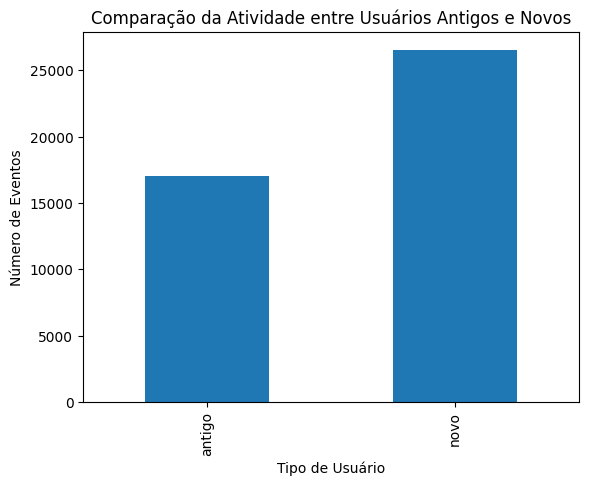

In [50]:
atividade = dados_completos.groupby('tipo_usuario')['eventos'].count()
atividade.plot(kind='bar')
plt.title('Comparação da Atividade entre Usuários Antigos e Novos')
plt.xlabel('Tipo de Usuário')
plt.ylabel('Número de Eventos')
plt.show()